In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


## Data Collection and Preprocessing

In [2]:
# Load the dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first few rows of the dataset
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [5]:
# Handle missing values
# For simplicity, let's drop any rows with missing values
data = data.dropna()

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['Partner'] = label_encoder.fit_transform(data['Partner'])
data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
data['Contract'] = label_encoder.fit_transform(data['Contract'])
data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
data['Churn'] = label_encoder.fit_transform(data['Churn'])

# Convert 'TotalCharges' to numeric (assuming it's a numerical column)
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Display the preprocessed data
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [6]:
# Convert to numeric, coercing errors to NaN
data['customerID'] = pd.to_numeric(data['customerID'], errors='coerce')

# Convert NaN values to 0 or any other suitable value
data['customerID'].fillna(0, inplace=True)

# Convert the column to int
data['customerID'] = data['customerID'].astype(int)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int64  
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   int64  
 10  OnlineBackup      7043 non-null   int64  
 11  DeviceProtection  7043 non-null   int64  
 12  TechSupport       7043 non-null   int64  
 13  StreamingTV       7043 non-null   int64  
 14  StreamingMovies   7043 non-null   int64  
 15  Contract          7043 non-null   int64  
 16  PaperlessBilling  7043 non-null   int64  


In [8]:
# # Encode categorical variables using Label Encoding
# label_encoder = LabelEncoder()
# data['gender'] = label_encoder.fit_transform(data['gender'])
# data['Partner'] = label_encoder.fit_transform(data['Partner'])
# data['Dependents'] = label_encoder.fit_transform(data['Dependents'])
# data['PhoneService'] = label_encoder.fit_transform(data['PhoneService'])
# data['MultipleLines'] = label_encoder.fit_transform(data['MultipleLines'])
# data['InternetService'] = label_encoder.fit_transform(data['InternetService'])
# data['OnlineSecurity'] = label_encoder.fit_transform(data['OnlineSecurity'])
# data['OnlineBackup'] = label_encoder.fit_transform(data['OnlineBackup'])
# data['DeviceProtection'] = label_encoder.fit_transform(data['DeviceProtection'])
# data['TechSupport'] = label_encoder.fit_transform(data['TechSupport'])
# data['StreamingTV'] = label_encoder.fit_transform(data['StreamingTV'])
# data['StreamingMovies'] = label_encoder.fit_transform(data['StreamingMovies'])
# data['Contract'] = label_encoder.fit_transform(data['Contract'])
# data['PaperlessBilling'] = label_encoder.fit_transform(data['PaperlessBilling'])
# data['PaymentMethod'] = label_encoder.fit_transform(data['PaymentMethod'])
# data['Churn'] = label_encoder.fit_transform(data['Churn'])

# # Convert 'TotalCharges' to numeric (assuming it's a numerical column)
# data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# # Display the preprocessed data
# data.head()

## Exploratory Data Analysis (EDA)

In [9]:

# Display summary statistics
print(data.describe())



       customerID       gender  SeniorCitizen      Partner   Dependents  \
count      7043.0  7043.000000    7043.000000  7043.000000  7043.000000   
mean          0.0     0.504756       0.162147     0.483033     0.299588   
std           0.0     0.500013       0.368612     0.499748     0.458110   
min           0.0     0.000000       0.000000     0.000000     0.000000   
25%           0.0     0.000000       0.000000     0.000000     0.000000   
50%           0.0     1.000000       0.000000     0.000000     0.000000   
75%           0.0     1.000000       0.000000     1.000000     1.000000   
max           0.0     1.000000       1.000000     1.000000     1.000000   

            tenure  PhoneService  MultipleLines  InternetService  \
count  7043.000000   7043.000000    7043.000000      7043.000000   
mean     32.371149      0.903166       0.940508         0.872923   
std      24.559481      0.295752       0.948554         0.737796   
min       0.000000      0.000000       0.000000     

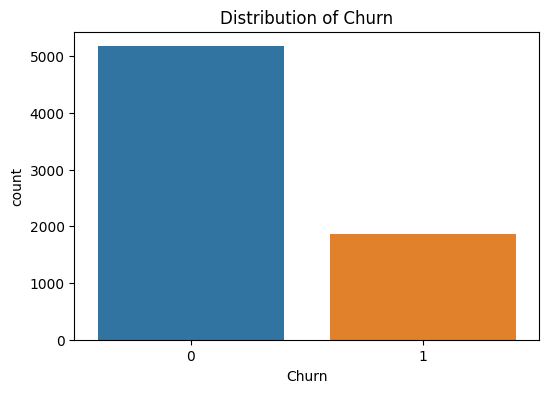

In [10]:
# Visualize the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Distribution of Churn')
plt.show()



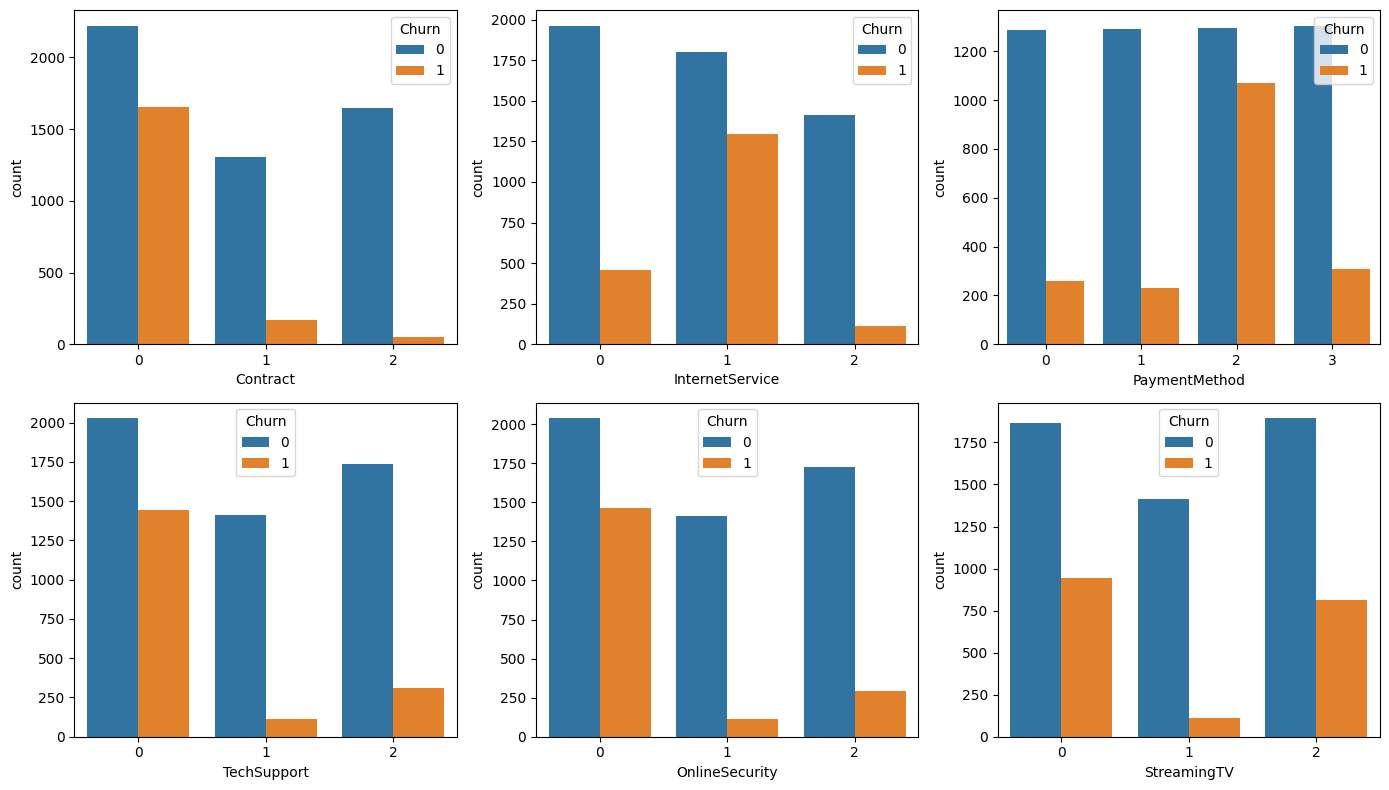

In [11]:
# Explore categorical variables
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.countplot(x='Contract', hue='Churn', data=data)
plt.subplot(2, 3, 2)
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.subplot(2, 3, 3)
sns.countplot(x='PaymentMethod', hue='Churn', data=data)
plt.subplot(2, 3, 4)
sns.countplot(x='TechSupport', hue='Churn', data=data)
plt.subplot(2, 3, 5)
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.subplot(2, 3, 6)
sns.countplot(x='StreamingTV', hue='Churn', data=data)
plt.tight_layout()
plt.show()



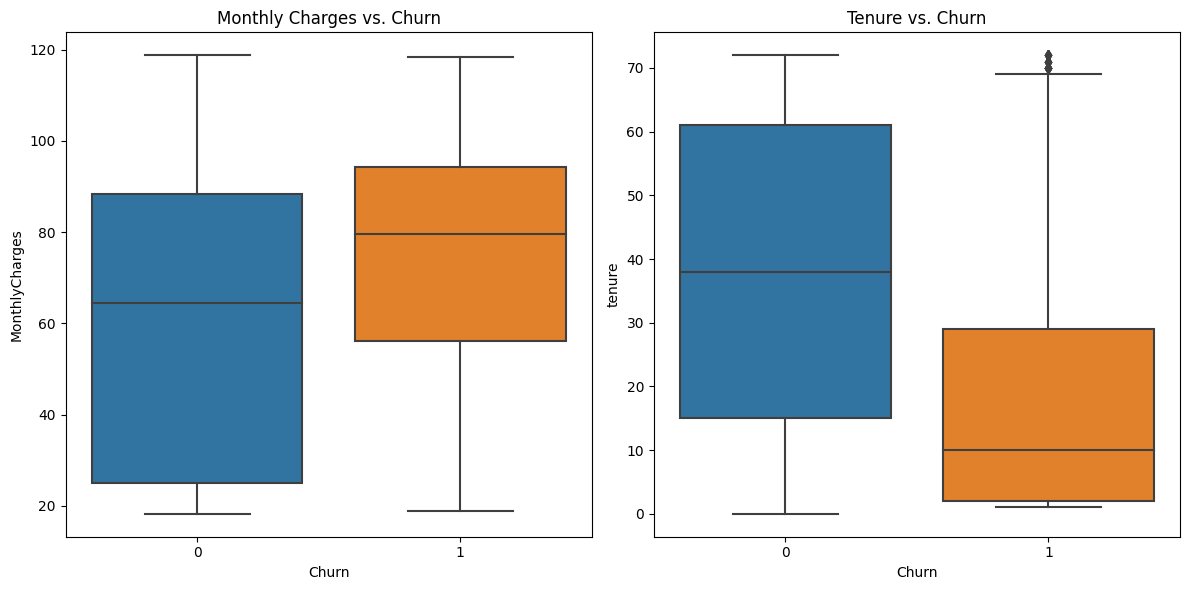

In [12]:
# Explore numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs. Churn')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Tenure vs. Churn')

plt.tight_layout()
plt.show()



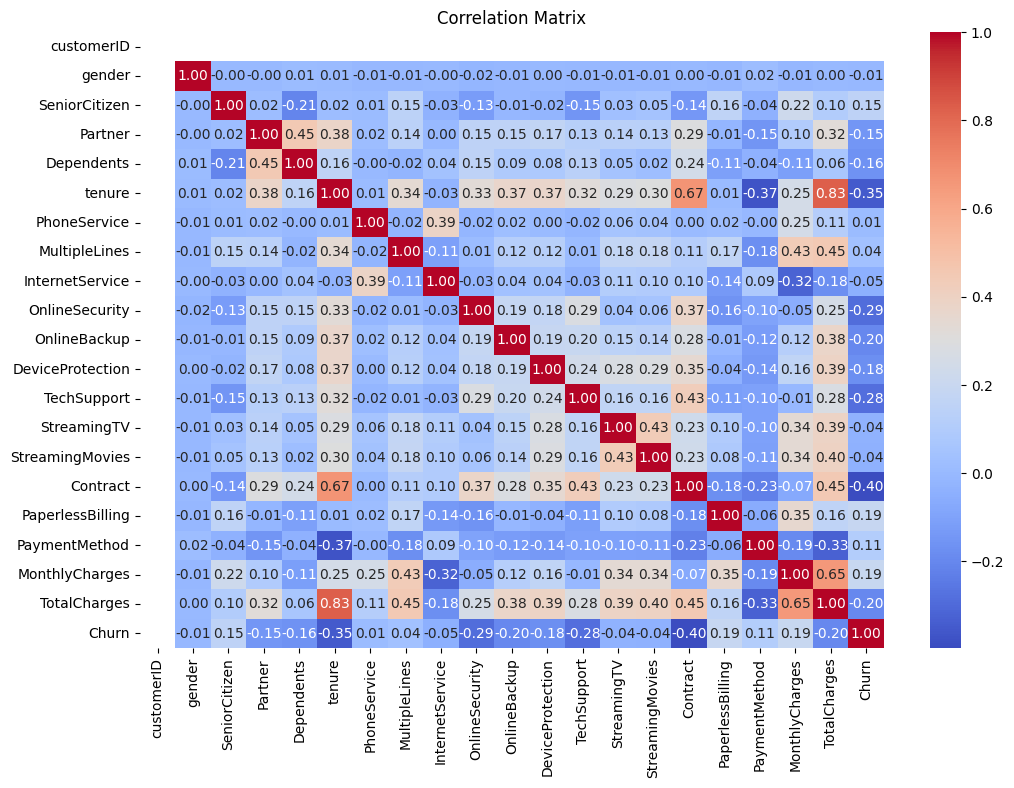

In [13]:
# Check for correlation between variables
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


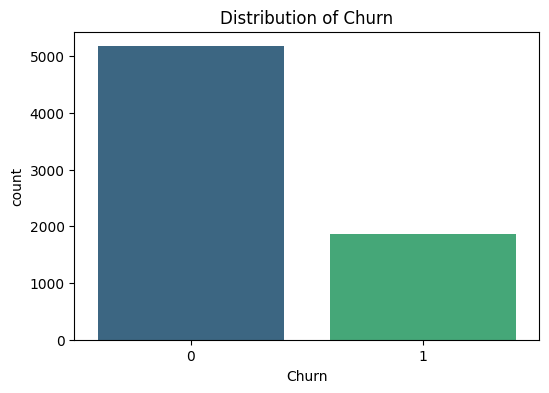

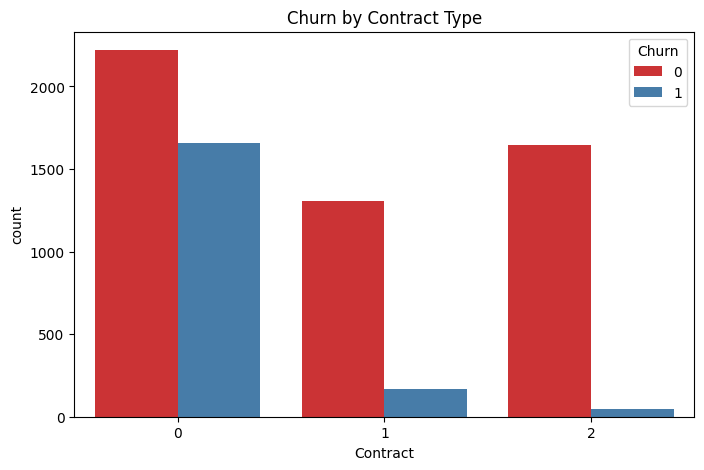

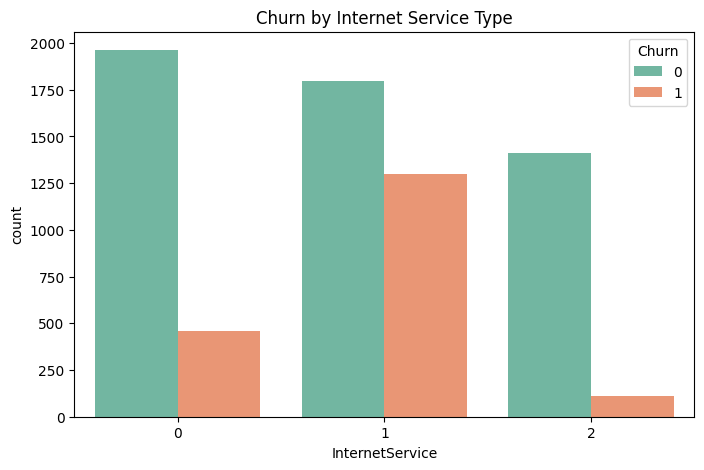

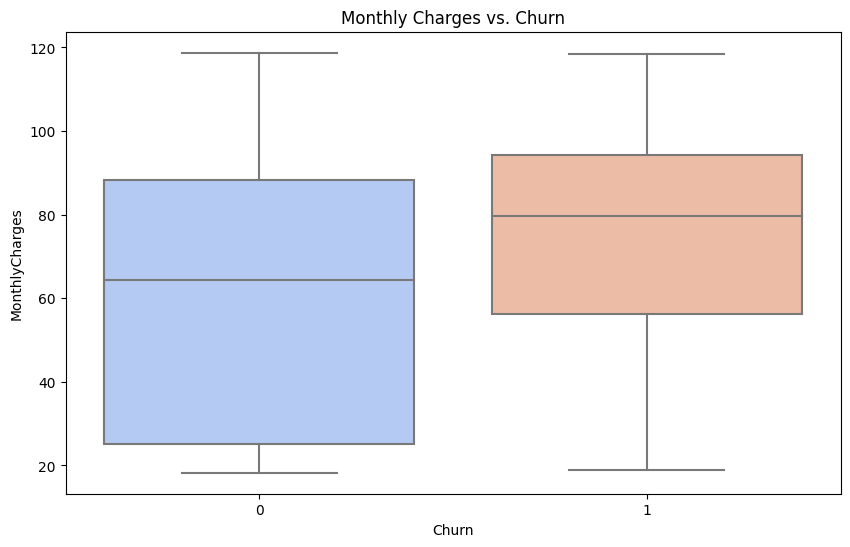

In [14]:

# Visualize key findings using appropriate graphs and charts

# Distribution of Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='viridis')
plt.title('Distribution of Churn')
plt.show()

# Distribution of Contract types
plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', data=data, hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.show()


# Distribution of Internet Service types
plt.figure(figsize=(8, 5))
sns.countplot(x='InternetService', data=data, hue='Churn', palette='Set2')
plt.title('Churn by Internet Service Type')
plt.show()

# Monthly Charges vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='coolwarm')
plt.title('Monthly Charges vs. Churn')
plt.show()

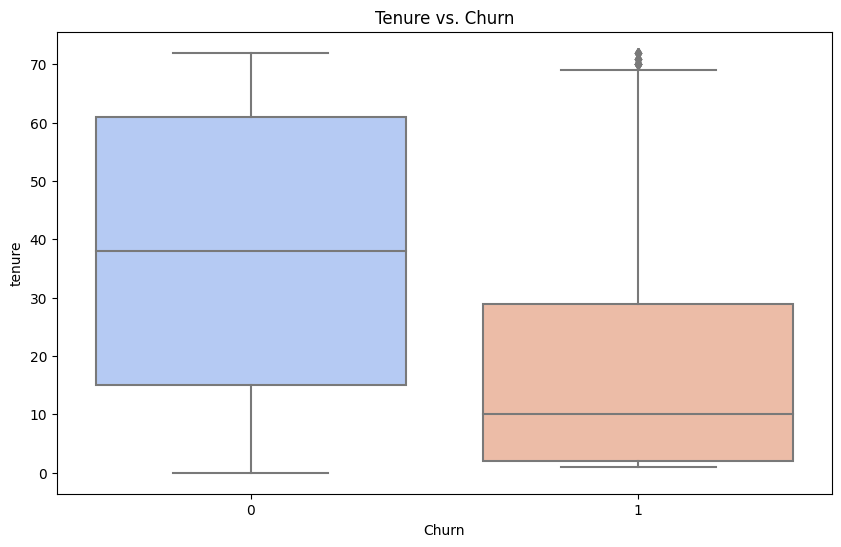

In [15]:

# Tenure vs. Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data, palette='coolwarm')
plt.title('Tenure vs. Churn')
plt.show()



## Feature Engineering:

In [16]:


# Create a new feature 'Family' based on 'Partner' and 'Dependents'
data['Family'] = np.where((data['Partner'] == 'Yes') | (data['Dependents'] == 'Yes'), 'Yes', 'No')

# Drop unnecessary columns
data = data.drop(['customerID', 'Partner', 'Dependents'], axis=1)

# Display the dataset with the new feature
data.head()


,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Family
0,0,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0,No
1,1,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0,No
2,1,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1,No
3,1,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0,No
4,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1,No


## Building the Churn Prediction Model

In [17]:

# Define features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [18]:
# Build a pipeline for preprocessing and modeling
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Using ColumnTransformer with LabelEncoder for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [19]:
# Build the full pipeline with preprocessing and model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression())])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)




## Model Evaluation

In [20]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8176011355571328
Precision: 0.6779141104294478
Recall: 0.5924932975871313
F1 Score: 0.6323319027181687
Confusion Matrix:
[[931 105]
 [152 221]]


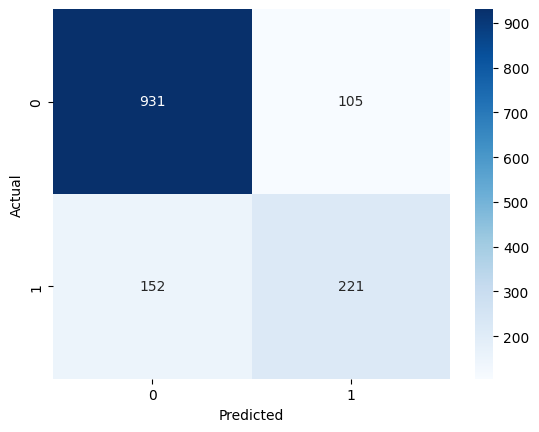

In [22]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()